In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Monaco", 'FP2')
race.load()

Get all the laps for a single driver

In [16]:
driver= "ALO"
driver_laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()

Make the scattterplot using lap number as x-axis and lap time as y-axis. Marker colors correspond to the compounds used. Note: as LapTime is represented by timedelta, calling setup_mpl earlier is required.

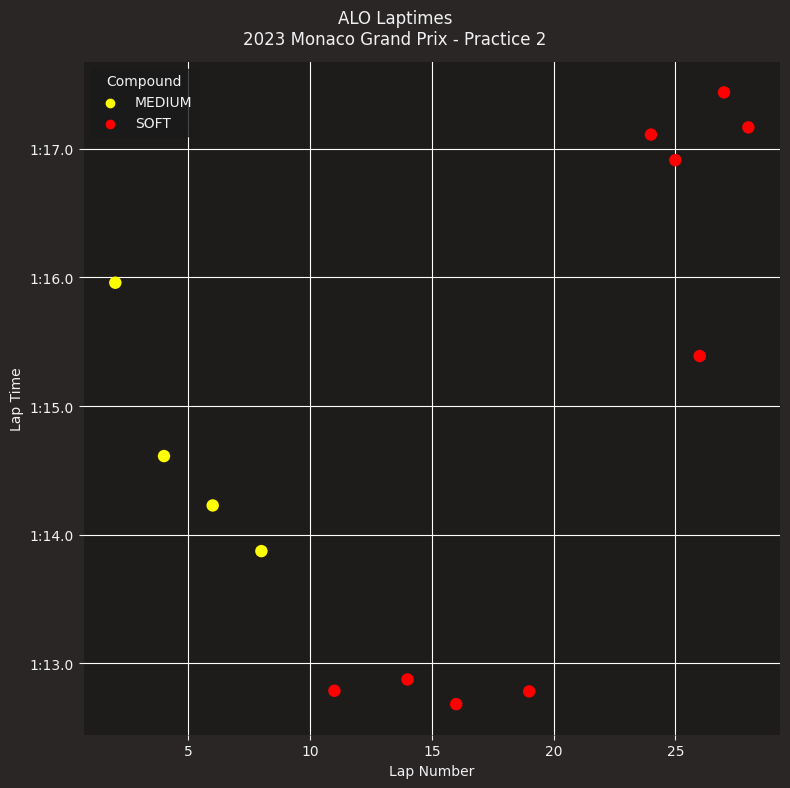

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=['yellow', 'red'],
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{driver} Laptimes\n{race.event.year} {race.event.EventName} - {race.name}")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()